# Migraine Classification Data Set

Data Set Characteristics:	Multivariate
Number of Instances:	400	
Area:	Health
Attribute Characteristics:	Real	
Number of Attributes:	24		
Associated Tasks:	Classification	
Missing Values:	No		


Data Set Information:
Database comprising 400 medical records of users diagnosed with various pathologies associated with migraines. Data were recorded by trained medical personnel at the Centro Materno Infantil de Soledad during the first quarter of 2013. The compiled database contains information regarding symptoms or variable of interest required for the classification of migraines.

Attribute Information:
1) Age: Patient's age

2) Duration: duration of symptoms in last episode in days

3) Frequency: Frequency of episodes per month

4) Location: Unilateral or bilateral pain location (None - 0, Unilateral - 1, Bilateral - 2)

5) Character: Throbbing or constant pain (None - 0, Thobbing - 1, Constant - 2)

6) Intensity: Pain intensity, i.e., mild, medium, or severe (None - 0, Mild - 
1, Medium - 2, Severe - 3)

7) Nausea: Nauseous feeling (Not - 0, Yes - 1)

8) Vomit: Vomiting (Not - 0, Yes - 1)

9) Phonophobia: Noise sensitivity (Not - 0, Yes - 1)

10) Photophobia: Light sensitivity (Not - 0, Yes - 1)

11) Visual: Number of reversible visual symptoms

12) Sensory: Number of reversible sensory symptoms

13) Dysphasia: Lack of speech coordination (Not - 0, Yes - 1)

14) Dysarthria: Disarticulated sounds and words (Not - 0, Yes - 1)

15) Vertigo: Dizziness (Not - 0, Yes - 1)

16) Tinnitus: Ringing in the ears (Not - 0, Yes - 1)

17) Hypoacusis: Hearing loss (Not - 0, Yes - 1)

18) Diplopia: Double vision (Not - 0, Yes - 1)

19) Visual defect: Simultaneous frontal eye field and nasal field defect and in 
both eyes (Not - 0, Yes - 1)

20) Ataxia: Lack of muscle control (Not - 0, Yes - 1)

21) Conscience: Jeopardized conscience (Not - 0, Yes - 1)

22) Paresthesia: Simultaneous bilateral paresthesia (Not - 0, Yes - 1)

23) DPF: Family background (Not - 0, Yes - 1)

24) Type: Diagnosis of migraine type (Typical aura with migraine, Migraine 
without aura, Typical aura without migraine, Familial hemiplegic migraine, Sporadic hemiplegic migraine, Basilar-type aura, Other)

# Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

# Accessing the dataset

In [ ]:
import pandas as pd
df= pd.read_csv('migraine.csv')
df.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [ ]:
# Check data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

In [ ]:
# Lable Encoding 
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df["Type"]=l.fit_transform(df["Type"])

In [ ]:
df

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,5
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,5
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,5
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,5
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,1,0,0,1,0,0,0,0,1,0
396,20,3,2,1,1,3,1,0,1,1,...,0,1,1,0,0,0,0,0,1,0
397,28,3,2,1,1,3,1,0,1,1,...,1,0,0,0,1,0,0,0,1,0
398,20,3,1,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,1,1,0


In [ ]:
df.describe()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000,400.000000
mean,31.705000,1.610000,2.365000,0.972500,0.977500,2.47000,0.987500,0.322500,0.977500,0.980000,...,0.125000,0.060000,0.015000,0.005000,0.015000,0.0,0.017500,0.007500,0.410000,4.015000
std,12.139043,0.770964,1.675947,0.268186,0.277825,0.76849,0.111242,0.468019,0.148489,0.140175,...,0.331133,0.237784,0.121705,0.070622,0.121705,0.0,0.131289,0.086385,0.492449,1.651239
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000
50%,28.000000,1.000000,2.000000,1.000000,1.000000,3.00000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,5.000000
75%,40.000000,2.000000,4.000000,1.000000,1.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,5.000000
max,77.000000,3.000000,8.000000,2.000000,2.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,6.000000


In [ ]:
# Check the null values from the data
df.isnull().sum()

Age            0
Duration       0
Frequency      0
Location       0
Character      0
Intensity      0
Nausea         0
Vomit          0
Phonophobia    0
Photophobia    0
Visual         0
Sensory        0
Dysphasia      0
Dysarthria     0
Vertigo        0
Tinnitus       0
Hypoacusis     0
Diplopia       0
Defect         0
Ataxia         0
Conscience     0
Paresthesia    0
DPF            0
Type           0
dtype: int64

In [ ]:
# Classes of dependent variable
df["Type"].unique()

array([5, 2, 0, 4, 1, 3, 6])

In [ ]:
# Detecting Duplicate Columns
df.duplicated().sum()

6

In [ ]:
##Dropping duplicates 
df.drop_duplicates(keep = 'first', inplace = True)
df

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,5
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,5
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,5
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,5
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,1,0,0,1,0,0,0,0,1,0
396,20,3,2,1,1,3,1,0,1,1,...,0,1,1,0,0,0,0,0,1,0
397,28,3,2,1,1,3,1,0,1,1,...,1,0,0,0,1,0,0,0,1,0
398,20,3,1,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,1,1,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


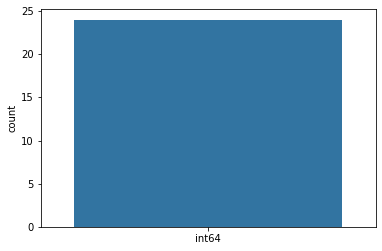

In [ ]:
import seaborn as sns
sns.countplot(df.dtypes.map(str));

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

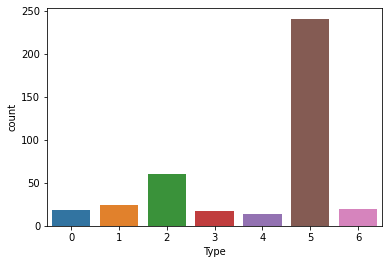

In [ ]:
sns.countplot(df["Type"])    # Check Balancing of data 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


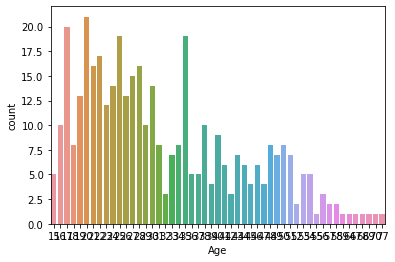

In [ ]:
sns.countplot(df["Age"]);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


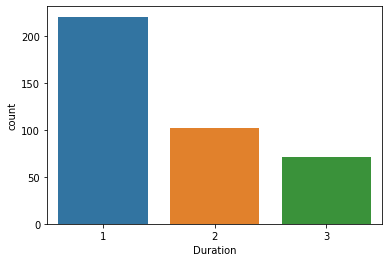

In [ ]:
sns.countplot(df["Duration"]);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


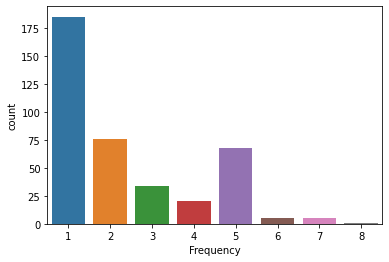

In [ ]:
sns.countplot(df["Frequency"]);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


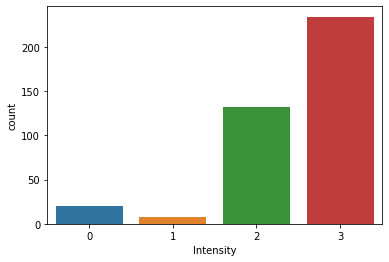

In [ ]:
sns.countplot(df["Intensity"]);

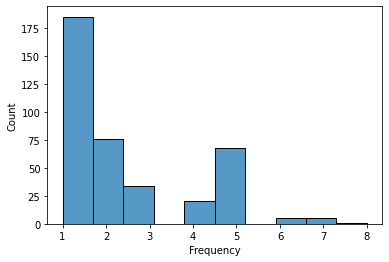

In [ ]:
sns.histplot(df["Frequency"]);

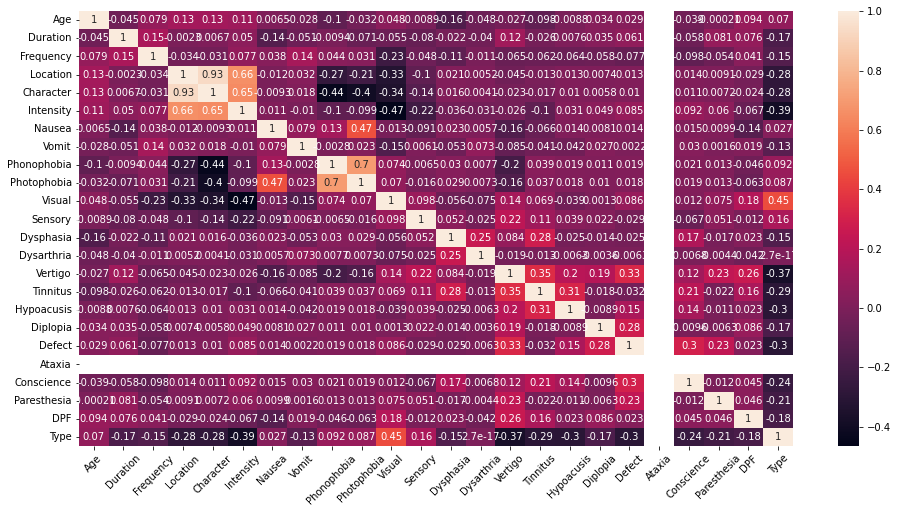

In [ ]:
##Correlation between the features  
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(),annot=True)
plt.xticks(rotation=45);

In [ ]:
# Investigate the number of unique values in each column
for i in df.columns:
  print(f'The column "{i}" has {len(df[i].value_counts())} unique values.')

The column "Age" has 51 unique values.
The column "Duration" has 3 unique values.
The column "Frequency" has 8 unique values.
The column "Location" has 3 unique values.
The column "Character" has 3 unique values.
The column "Intensity" has 4 unique values.
The column "Nausea" has 2 unique values.
The column "Vomit" has 2 unique values.
The column "Phonophobia" has 2 unique values.
The column "Photophobia" has 2 unique values.
The column "Visual" has 5 unique values.
The column "Sensory" has 3 unique values.
The column "Dysphasia" has 2 unique values.
The column "Dysarthria" has 2 unique values.
The column "Vertigo" has 2 unique values.
The column "Tinnitus" has 2 unique values.
The column "Hypoacusis" has 2 unique values.
The column "Diplopia" has 2 unique values.
The column "Defect" has 2 unique values.
The column "Ataxia" has 1 unique values.
The column "Conscience" has 2 unique values.
The column "Paresthesia" has 2 unique values.
The column "DPF" has 2 unique values.
The column "Ty

Since feature 'Ataxia' (lack of muscle control) only has one unique value and is a categorical feature, we will remove it from the data as it is just noise.

In [ ]:
#remove column Ataxia from dataset
df = df.drop(['Ataxia'],axis=1)

# EDA

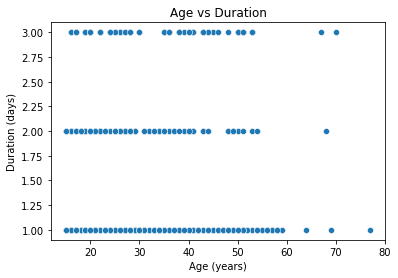

In [ ]:
#Let's see if there is a correlation between Age and Duration of the last episode's symptoms
sns.scatterplot(data=df,x='Age',y='Duration').set(title='Age vs Duration', xlabel='Age (years)', ylabel='Duration (days)');

We see there is no obvious correlation between Age and Duration. Let's see Age vs Frequency of episodes per month.

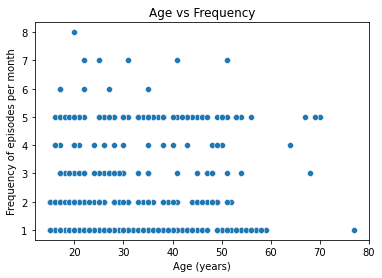

In [ ]:
sns.scatterplot(data=df,x='Age',y='Frequency').set(title='Age vs Frequency', xlabel='Age (years)', ylabel='Frequency of episodes per month');

For frequencies 5 and lower we have the data spread out over age, but for 6 or more frequencies we notice that these values are generally between 20-40 years of age.

# Data Preparation

In [ ]:
#Show first 5 rows. Notice the first 3 columns have been scaled
df.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,5
1,50,3,5,1,1,3,1,1,1,1,...,0,1,0,0,0,0,0,0,0,5
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,5
3,45,3,5,1,1,3,1,0,1,1,...,0,1,0,0,0,0,0,0,0,5
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,5


In [ ]:
#first assign data into predictive features (X) and the predicted feature (y)
X = df.iloc[:,0:df.shape[1]-1].values
y = df.iloc[:,-1].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 100)

# Model-1: Basic Model
#### Building a neural network model

In [ ]:
import tensorflow as tf

model1= tf.keras.Sequential()

model1.add(tf.keras.layers.Dense(300, activation ='relu')) # activation used to decide whether to send signal to next layer or not
model1.add(tf.keras.layers.Dense(7, activation= 'softmax'))


#### Compiling the model

In [ ]:
model1.compile(optimizer= tf.keras.optimizers.Adam(),
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics= ['accuracy'])

#### Training the model

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 2.6760 - accuracy: 0.3651
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 1.4266 - accuracy: 0.6222
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.3067 - accuracy: 0.6476
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1561 - accuracy: 0.6254
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0491 - accuracy: 0.7175
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0110 - accuracy: 0.6381
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9249 - accuracy: 0.7270
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8620 - accuracy: 0.7175
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.8168 - accuracy: 0.7048
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7770 - accuracy: 0.7683
Epoch 11/

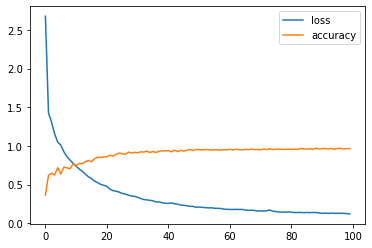

In [ ]:
tf.random.set_seed(100)
history= model1.fit(X_train, y_train, epochs= 100)

hist= pd.DataFrame(history.history)
hist.plot();

In [ ]:
train_loss= float(hist['loss'].iloc[-1:])
train_accuracy= float(hist['accuracy'].iloc[-1:])
train_loss, train_accuracy

(0.12178117036819458, 0.9650793671607971)

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               6900      
                                                                 
 dense_1 (Dense)             (None, 7)                 2107      
                                                                 
Total params: 9,007
Trainable params: 9,007
Non-trainable params: 0
_________________________________________________________________


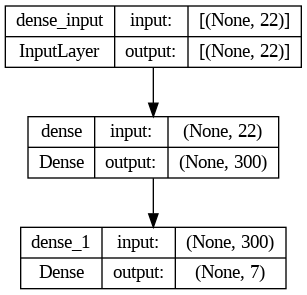

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model1, show_shapes= True)

#### Evaluation of the model

In [ ]:
accuracy_test=[]
test_loss, test_accuracy = model1.evaluate(X_test, y_test)

accuracy_test.append(test_accuracy)
test_loss, test_accuracy

3/3 [==============================] - 0s 7ms/step - loss: 0.3882 - accuracy: 0.9114


(0.38816404342651367, 0.9113923907279968)

In [ ]:
loss_test=[]
loss_train=[]

print('Test Loss:',test_loss)
print('Train Loss:',train_loss)

loss_test.append(test_loss)
loss_train.append(train_loss)

Test Loss: 0.38816404342651367
Train Loss: 0.12178117036819458


In [ ]:
print('Test Accuracy:',test_accuracy)
print('Train Accuracy:',train_accuracy)

Test Accuracy: 0.9113923907279968
Train Accuracy: 0.9650793671607971


# Comment 1:
**Basic model**: Training loss: 0.1217; Test loss: 0.3881. Overfitting

# Model- 2
## Model with Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
x_scaled= sc.fit_transform(X)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 100)

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 1.8144 - accuracy: 0.4127
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 1.3111 - accuracy: 0.7587
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9614 - accuracy: 0.8222
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7229 - accuracy: 0.8381
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5696 - accuracy: 0.8603
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4659 - accuracy: 0.8889
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3972 - accuracy: 0.9111
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3470 - accuracy: 0.9175
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3094 - accuracy: 0.9302
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2791 - accuracy: 0.9333
Epoch 11/

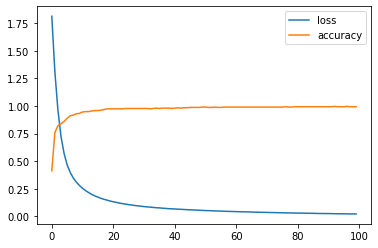

In [ ]:
# Building model with normalized data
model2= tf.keras.Sequential()

model2.add(tf.keras.layers.Dense(300, activation='relu'))    # Hidden layer
model2.add(tf.keras.layers.Dense(7, activation= 'softmax'))  # softmax-> ex for each output and then ex/(1+ex)

# Compiling the model
model2.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Training
tf.random.set_seed(100)
hist2= model2.fit(X_train, y_train, epochs=100)
hist2= pd.DataFrame(hist2.history)
hist2.plot();

In [ ]:
train_loss= float(hist2['loss'].iloc[-1:])
train_accuracy= float(hist2['accuracy'].iloc[-1:])
train_loss, train_accuracy

(0.021406415849924088, 0.9936507940292358)

In [ ]:
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
test_loss, test_accuracy

3/3 [==============================] - 0s 5ms/step - loss: 0.5445 - accuracy: 0.8987


(0.5445142388343811, 0.8987341523170471)

In [ ]:
accuracy_test.append(test_accuracy)

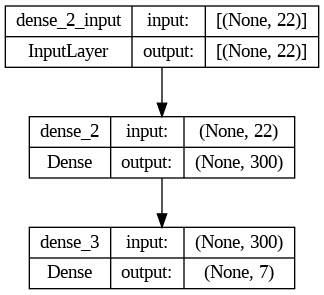

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model2, show_shapes= True)

In [ ]:
print('Test Loss:',test_loss)
print('Train Loss:',train_loss)

loss_test.append(test_loss)
loss_train.append(train_loss)

Test Loss: 0.5445142388343811
Train Loss: 0.021406415849924088


In [ ]:
print('Test Accuracy:',test_accuracy)
print('Train Accuracy:', train_accuracy)

Test Accuracy: 0.8987341523170471
Train Accuracy: 0.9936507940292358


# Comment 2:
**Basic model**: Training loss: 0.1217; Test loss: 0.3881. Overfitting

**Model with normalization**: Training loss: 0.0214; Test loss: 0.5445. Increase in overfitting.

# Changing the epochs
# MODEL-3
## Model with 50 epochs

Epoch 1/50
10/10 [==============================] - 1s 3ms/step - loss: 1.8194 - accuracy: 0.4000
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 1.3334 - accuracy: 0.7841
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.9878 - accuracy: 0.8095
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 0.7430 - accuracy: 0.8349
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 0.5816 - accuracy: 0.8762
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.4737 - accuracy: 0.8889
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 0.4025 - accuracy: 0.8984
Epoch 8/50
10/10 [==============================] - 0s 3ms/step - loss: 0.3512 - accuracy: 0.9048
Epoch 9/50
10/10 [==============================] - 0s 3ms/step - loss: 0.3135 - accuracy: 0.9270
Epoch 10/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2837 - accuracy: 0.9397
Epoch 11/50
10/10 [

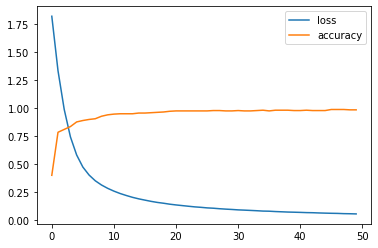

In [ ]:
import tensorflow as tf

model3= tf.keras.Sequential()

model3.add(tf.keras.layers.Dense(300, activation ='relu')) # activation used to decide whether to send signal to next layer or not
model3.add(tf.keras.layers.Dense(7, activation= 'softmax'))

# Compiling the model

model3.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Training
tf.random.set_seed(100)

hist3= model3.fit(X_train, y_train, epochs=50)
hist3= pd.DataFrame(hist3.history)
hist3.plot();

In [ ]:
train_loss= float(hist3['loss'].iloc[-1:])
train_accuracy= float(hist3['accuracy'].iloc[-1:])
train_loss, train_accuracy

(0.05547284334897995, 0.9841269850730896)

In [ ]:
# Evaluation of the test data

model3.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 0.4472 - accuracy: 0.9114


[0.44723275303840637, 0.9113923907279968]

In [ ]:
test_loss, test_accuracy = model3.evaluate(X_test, y_test)
accuracy_test.append(test_accuracy)
test_loss, test_accuracy

3/3 [==============================] - 0s 5ms/step - loss: 0.4472 - accuracy: 0.9114


(0.44723275303840637, 0.9113923907279968)

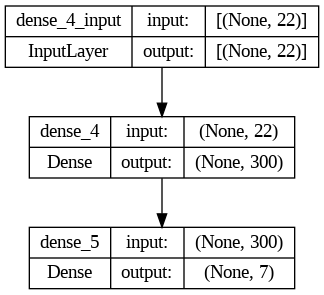

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model3, show_shapes= True)

In [ ]:
print('Test Loss:',test_loss)
print('Train Loss:',train_loss)

loss_test.append(test_loss)
loss_train.append(train_loss)

Test Loss: 0.44723275303840637
Train Loss: 0.05547284334897995


In [ ]:
print('Test Accuracy:',test_accuracy)
print('Train Accuracy:',train_accuracy)

Test Accuracy: 0.9113923907279968
Train Accuracy: 0.9841269850730896


# Comment 3:
Basic model: Training loss: 0.1217; Test loss: 0.3881. Overfitting

Model with normalization: Training loss: 0.0214; Test loss: 0.5445. Increase in overfitting.

Model with 50 epochs with normalization: Training loss: 0.0554; Test loss: 0.4472. Model improved but still overfitting

#MODEL 4
## Model with 300 epochs

Epoch 1/300
10/10 [==============================] - 1s 7ms/step - loss: 1.7224 - accuracy: 0.5619
Epoch 2/300
10/10 [==============================] - 0s 5ms/step - loss: 1.2577 - accuracy: 0.7683
Epoch 3/300
10/10 [==============================] - 0s 5ms/step - loss: 0.9203 - accuracy: 0.8095
Epoch 4/300
10/10 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.8413
Epoch 5/300
10/10 [==============================] - 0s 4ms/step - loss: 0.5463 - accuracy: 0.8635
Epoch 6/300
10/10 [==============================] - 0s 4ms/step - loss: 0.4466 - accuracy: 0.8984
Epoch 7/300
10/10 [==============================] - 0s 4ms/step - loss: 0.3809 - accuracy: 0.9143
Epoch 8/300
10/10 [==============================] - 0s 4ms/step - loss: 0.3331 - accuracy: 0.9206
Epoch 9/300
10/10 [==============================] - 0s 4ms/step - loss: 0.2974 - accuracy: 0.9302
Epoch 10/300
10/10 [==============================] - 0s 4ms/step - loss: 0.2687 - accuracy: 0.9397
Epoch 11/

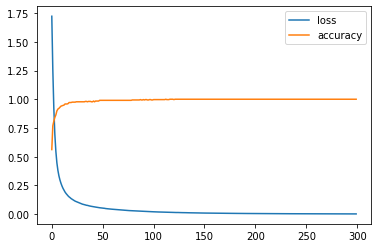

In [ ]:
import tensorflow as tf

model4= tf.keras.Sequential()

model4.add(tf.keras.layers.Dense(300, activation ='relu')) # activation used to decide whether to send signal to next layer or not
model4.add(tf.keras.layers.Dense(7, activation= 'softmax'))

# Compiling the model

model4.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Training
tf.random.set_seed(100)

hist4= model4.fit(X_train, y_train, epochs=300)
hist4= pd.DataFrame(hist4.history)
hist4.plot();

In [ ]:
test_loss, test_accuracy = model4.evaluate(X_test, y_test)
test_loss, test_accuracy

3/3 [==============================] - 0s 5ms/step - loss: 0.8068 - accuracy: 0.9114


(0.8068336248397827, 0.9113923907279968)

In [ ]:
accuracy_test.append(test_accuracy)

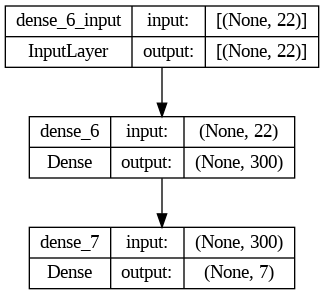

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model4, show_shapes= True)

In [ ]:
train_loss= float(hist4['loss'].iloc[-1:])
train_accuracy= float(hist4['accuracy'].iloc[-1:])
train_loss, train_accuracy

(0.0017027908470481634, 1.0)

In [ ]:
print('Test Loss:',test_loss)
print('Train Loss:', train_loss)

loss_test.append(test_loss)
loss_train.append(train_loss)

Test Loss: 0.8068336248397827
Train Loss: 0.0017027908470481634


In [ ]:
print('Test Accuracy:',test_accuracy)
print('Train Accuracy:', train_accuracy)

Test Accuracy: 0.9113923907279968
Train Accuracy: 1.0


# Comment 4:
Basic model: Training loss: 0.1217; Test loss: 0.3881. Overfitting

Model with normalization: Training loss: 0.0204; Test loss: 0.5445. Increase in overfitting.

Model with 50 epochs with normalization: Training loss: 0.0554; Test loss: 0.4472. Overfitting decreased

Model with 300 epochs with normalization: Training loss: 0.0017; Test loss: 0.8068. Overfitting increased. retain model 3

# MODEL -5
## Model with changed no. of hidden untis
## Model with 400 hidden units

Epoch 1/50
10/10 [==============================] - 1s 4ms/step - loss: 1.7262 - accuracy: 0.5333
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 1.2058 - accuracy: 0.8190
Epoch 3/50
10/10 [==============================] - 0s 4ms/step - loss: 0.8564 - accuracy: 0.8508
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 0.6238 - accuracy: 0.8794
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 0.4828 - accuracy: 0.8889
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.3926 - accuracy: 0.9079
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 0.3343 - accuracy: 0.9175
Epoch 8/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2912 - accuracy: 0.9206
Epoch 9/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2595 - accuracy: 0.9429
Epoch 10/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2329 - accuracy: 0.9492
Epoch 11/50
10/10 [

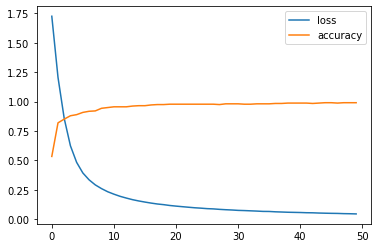

In [ ]:
import tensorflow as tf

model5= tf.keras.Sequential()

model5.add(tf.keras.layers.Dense(400, activation ='relu')) # activation used to decide whether to send signal to next layer or not
model5.add(tf.keras.layers.Dense(7, activation= 'softmax'))

# Compiling the model

model5.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Training
tf.random.set_seed(100)

hist5= model5.fit(X_train, y_train, epochs=50)
hist5= pd.DataFrame(hist5.history)
hist5.plot();

In [ ]:
train_loss= float(hist5['loss'].iloc[-1:])
train_accuracy= float(hist5['accuracy'].iloc[-1:])
train_loss, train_accuracy

(0.0441131666302681, 0.9904761910438538)

In [ ]:
test_loss, test_accuracy = model5.evaluate(X_test, y_test)
test_loss, test_accuracy

3/3 [==============================] - 0s 5ms/step - loss: 0.4756 - accuracy: 0.9114


(0.4756350517272949, 0.9113923907279968)

In [ ]:
accuracy_test.append(test_accuracy)

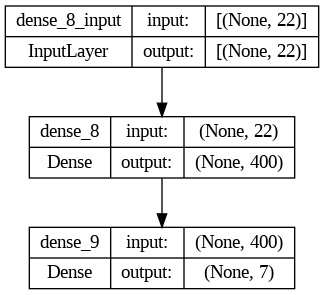

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model5, show_shapes= True)

In [ ]:
print('Test Loss:',test_loss)
print('Train Loss:',train_loss)

loss_test.append(test_loss)
loss_train.append(train_loss)

Test Loss: 0.4756350517272949
Train Loss: 0.0441131666302681


In [ ]:
print('Test Accuracy:',test_accuracy)
print('Train Accuracy:', train_accuracy)

Test Accuracy: 0.9113923907279968
Train Accuracy: 0.9904761910438538


# Comment 5:
Basic model: Training loss: 0.1217; Test loss: 0.3881. Overfitting

Model with normalization: Training loss: 0.0204; Test loss: 0.5445. Increase in overfitting.

Model with 50 epochs with normalization: Training loss: 0.0554; Test loss: 0.4472. Overfitting decreased

Model with 300 epochs with normalization: Training loss: 0.0017; Test loss: 0.8068. Overfitting increased. Retain model3

Model with 400 hidden units with normalization: Training loss: 0.0441; Test loss: 0.4756. Overfitting compared to model3 increased. Retain model3

#MODEL-6
# Model with more hidden layers

Epoch 1/50
10/10 [==============================] - 1s 3ms/step - loss: 1.9058 - accuracy: 0.3143
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 1.4127 - accuracy: 0.6508
Epoch 3/50
10/10 [==============================] - 0s 4ms/step - loss: 1.0335 - accuracy: 0.7429
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 0.7186 - accuracy: 0.8159
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 0.5241 - accuracy: 0.8698
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.4018 - accuracy: 0.8984
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 0.3294 - accuracy: 0.9143
Epoch 8/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2788 - accuracy: 0.9333
Epoch 9/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2401 - accuracy: 0.9460
Epoch 10/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2102 - accuracy: 0.9524
Epoch 11/50
10/10 [

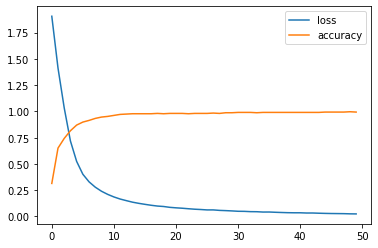

In [ ]:
import tensorflow as tf

model6= tf.keras.Sequential()

model6.add(tf.keras.layers.Dense(200, activation ='relu')) # activation used to decide whether to send signal to next layer or not
model6.add(tf.keras.layers.Dense(50, activation ='relu'))
model6.add(tf.keras.layers.Dense(7, activation= 'softmax'))

# Compiling the model

model6.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Training
tf.random.set_seed(100)

hist6= model6.fit(X_train, y_train, epochs=50)
hist6= pd.DataFrame(hist6.history)
hist6.plot();

In [ ]:
train_loss= float(hist6['loss'].iloc[-1:])
train_accuracy= float(hist6['accuracy'].iloc[-1:])
train_loss, train_accuracy

(0.024215755984187126, 0.9936507940292358)

In [ ]:
test_loss, test_accuracy = model6.evaluate(X_test, y_test)
test_loss, test_accuracy

3/3 [==============================] - 0s 6ms/step - loss: 0.5922 - accuracy: 0.8987


(0.5922037363052368, 0.8987341523170471)

In [ ]:
accuracy_test.append(test_accuracy)

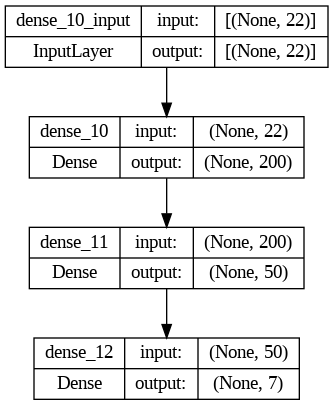

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model6, show_shapes= True)

In [ ]:
print('Test Loss:',test_loss)
print('Train Loss:', train_loss)

loss_test.append(test_loss)
loss_train.append(train_loss)

Test Loss: 0.5922037363052368
Train Loss: 0.024215755984187126


In [ ]:
print('Test Accuracy:',test_accuracy)
print('Train Accuracy:', train_accuracy)

Test Accuracy: 0.8987341523170471
Train Accuracy: 0.9936507940292358


# Comment 6:
Basic model: Training loss: 0.1217; Test loss: 0.3881. Overfitting

Model with normalization: Training loss: 0.0204; Test loss: 0.5445. Increase in overfitting.

Model with 50 epochs with normalization: Training loss: 0.0554; Test loss: 0.4472. Overfitting decreased

Model with 300 epochs with normalization: Training loss: 0.0017; Test loss: 0.8068. Overfitting increased. Retain model3

Model with 400 hidden units with normalization: Training loss:0.0441; Test loss: 0.4756. Overfitting compared to model3 increased. Retain model3

Model with 2 hidden layers and normalization: Training loss: 0.0242; Test loss: 0.5922. Overfitting compared to model3 increased. Retain model3

#MODEL-7
# Model with cross validation

Epoch 1/50
1/8 [==>...........................] - ETA: 4s - loss: 2.1381 - accuracy: 0.0000e+00

8/8 [==============================] - 1s 34ms/step - loss: 1.9088 - accuracy: 0.1746 - val_loss: 1.6676 - val_accuracy: 0.4286
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 1.5479 - accuracy: 0.6230 - val_loss: 1.3418 - val_accuracy: 0.7937
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 1.2601 - accuracy: 0.8254 - val_loss: 1.0767 - val_accuracy: 0.8889
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 1.0345 - accuracy: 0.8333 - val_loss: 0.8673 - val_accuracy: 0.9206
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.8536 - accuracy: 0.8254 - val_loss: 0.7079 - val_accuracy: 0.9206
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.7135 - accuracy: 0.8452 - val_loss: 0.5877 - val_accuracy: 0.9206
Epoch 7/50
8/8 [==============================] - 0s 10ms/step - loss: 0.6039 - accuracy: 0.8651 - val_loss: 0.5026 - val_accuracy: 0.9206
Epoch 8/50
8/8 [===========================

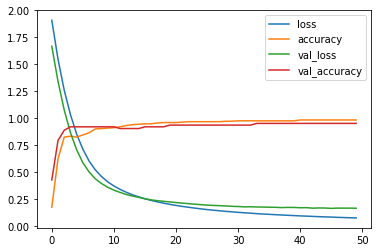

In [ ]:
import tensorflow as tf

model7= tf.keras.Sequential()

model7.add(tf.keras.layers.Dense(200, activation ='relu')) # activation used to decide whether to send signal to next layer or not
model7.add(tf.keras.layers.Dense(7, activation= 'softmax'))

# Compiling the model

model7.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Training
tf.random.set_seed(100)

hist7= model7.fit(X_train, y_train, epochs=50, validation_split= 0.2)
hist7= pd.DataFrame(hist7.history)
hist7.plot();

In [ ]:
train_loss= float(hist7['loss'].iloc[-1:])
train_accuracy= float(hist7['accuracy'].iloc[-1:])
train_loss, train_accuracy

(0.07602468878030777, 0.9841269850730896)

In [ ]:
test_loss, test_accuracy = model7.evaluate(X_test, y_test)
test_loss, test_accuracy

3/3 [==============================] - 0s 7ms/step - loss: 0.4491 - accuracy: 0.8987


(0.4491289258003235, 0.8987341523170471)

In [ ]:
accuracy_test.append(test_accuracy)

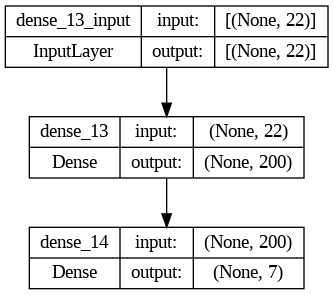

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model7, show_shapes= True)

In [ ]:
print('Test Loss:',test_loss)
print('Train Loss:',train_loss)

loss_test.append(test_loss)
loss_train.append(train_loss)

Test Loss: 0.4491289258003235
Train Loss: 0.07602468878030777


# Comment 7:
Basic model: Training loss: 0.1217; Test loss: 0.3881. Overfitting

Model with normalization: Training loss: 0.0204; Test loss: 0.5445. Increase in overfitting.

Model with 50 epochs with normalization: Training loss: 0.0554; Test loss: 0.4472. Overfitting decreased

Model with 300 epochs with normalization: Training loss: 0.0017; Test loss: 0.8068. Overfitting increased. Retain model3

Model with 400 hidden units with normalization: Training loss:0.0441; Test loss: 0.4756. Overfitting compared to model3 increased. Retain model3

Model with 2 hidden layers and normalization: Training loss: 0.0242; Test loss: 0.5922. Overfitting compared to model3 increased. Retain model3

Model with validation split: Training loss: 0.0706; Test loss: 0.4491. Model improved. But still overfitting

#MODEL- 8
# Model with dropout

Epoch 1/50
8/8 [==============================] - 1s 33ms/step - loss: 1.7864 - accuracy: 0.5595 - val_loss: 1.5372 - val_accuracy: 0.6984
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 1.4574 - accuracy: 0.7063 - val_loss: 1.2351 - val_accuracy: 0.7937
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 1.2172 - accuracy: 0.7381 - val_loss: 0.9869 - val_accuracy: 0.8095
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 1.0047 - accuracy: 0.7778 - val_loss: 0.7953 - val_accuracy: 0.8730
Epoch 5/50
8/8 [==============================] - 0s 11ms/step - loss: 0.8245 - accuracy: 0.8095 - val_loss: 0.6537 - val_accuracy: 0.9048
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6820 - accuracy: 0.8452 - val_loss: 0.5528 - val_accuracy: 0.9048
Epoch 7/50
8/8 [==============================] - 0s 10ms/step - loss: 0.5855 - accuracy: 0.8770 - val_loss: 0.4822 - val_accuracy: 0.9048
Epoch 8/50
8/8 [===============

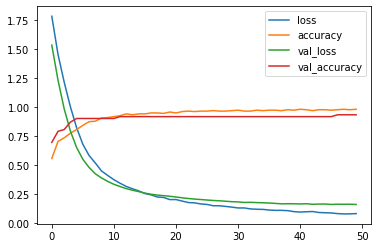

In [ ]:
import tensorflow as tf

model8= tf.keras.Sequential()

model8.add(tf.keras.layers.Dense(200, activation ='relu')) # activation used to decide whether to send signal to next layer or not

# Dropout layer performed on hidden layer
model8.add(tf.keras.layers.Dropout(0.1)) # 10% units in the hidden layer will be inactive

model8.add(tf.keras.layers.Dense(7, activation= 'softmax'))


# Compiling the model

model8.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Training
tf.random.set_seed(100)

hist8= model8.fit(X_train, y_train, epochs=50, validation_split= 0.2)
hist8= pd.DataFrame(hist8.history)
hist8.plot();

In [ ]:
train_loss= float(hist8['loss'].iloc[-1:])
train_accuracy= float(hist8['accuracy'].iloc[-1:])
train_loss, train_accuracy

(0.0844283178448677, 0.9841269850730896)

In [ ]:
test_loss, test_accuracy = model8.evaluate(X_test, y_test)
test_loss, test_accuracy

3/3 [==============================] - 0s 7ms/step - loss: 0.4260 - accuracy: 0.9114


(0.4259718954563141, 0.9113923907279968)

In [ ]:
accuracy_test.append(test_accuracy)

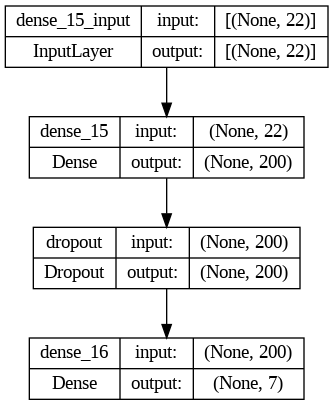

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model8, show_shapes= True)

In [ ]:
print('Test Loss:',test_loss)
print('Train Loss:',train_loss)

loss_test.append(test_loss)
loss_train.append(train_loss)

Test Loss: 0.4259718954563141
Train Loss: 0.0844283178448677


# Comment 8:
Basic model: Training loss: 0.1217; Test loss: 0.3881. Overfitting

Model with normalization: Training loss: 0.0204; Test loss: 0.5445. Increase in overfitting.

Model with 50 epochs with normalization: Training loss: 0.0554; Test loss: 0.4472. Overfitting decreased

Model with 300 epochs with normalization: Training loss: 0.0017; Test loss: 0.8068. Overfitting increased. Retain model3

Model with 400 hidden units with normalization: Training loss:0.0441; Test loss: 0.4756. Overfitting compared to model3 increased. Retain model3

Model with 2 hidden layers and normalization: Training loss: 0.0242; Test loss: 0.5922. Overfitting compared to model3 increased. Retain model3

Model with validation split: Training loss: 0.0706; Test loss: 0.4491. Model improved. But still overfitting.

Model with dropout: Training loss: 0.0844; Test loss: 0.4259. Model Improved. Overfitting slighlty decreased.

#MODEL- 9
# Model with early stopping

Epoch 1/50
8/8 [==============================] - 1s 32ms/step - loss: 1.9295 - accuracy: 0.2540 - val_loss: 1.6620 - val_accuracy: 0.5397
Epoch 2/50
8/8 [==============================] - 0s 10ms/step - loss: 1.5931 - accuracy: 0.6746 - val_loss: 1.3650 - val_accuracy: 0.8095
Epoch 3/50
8/8 [==============================] - 0s 11ms/step - loss: 1.3111 - accuracy: 0.7738 - val_loss: 1.1195 - val_accuracy: 0.8413
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 1.0988 - accuracy: 0.8175 - val_loss: 0.9219 - val_accuracy: 0.8730
Epoch 5/50
8/8 [==============================] - 0s 11ms/step - loss: 0.9209 - accuracy: 0.8333 - val_loss: 0.7644 - val_accuracy: 0.9048
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.7776 - accuracy: 0.8373 - val_loss: 0.6438 - val_accuracy: 0.9206
Epoch 7/50
8/8 [==============================] - 0s 10ms/step - loss: 0.6766 - accuracy: 0.8651 - val_loss: 0.5564 - val_accuracy: 0.9206
Epoch 8/50
8/8 [=============

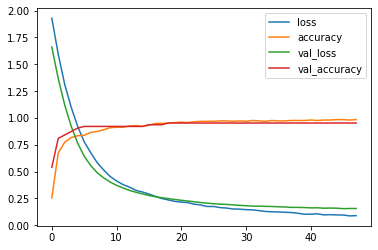

In [ ]:
import tensorflow as tf

model9= tf.keras.Sequential()

model9.add(tf.keras.layers.Dense(200, activation ='relu')) # activation used to decide whether to send signal to next layer or not

# Dropout layer performed on hidden layer
model9.add(tf.keras.layers.Dropout(0.1)) # 10% units in the hidden layer will be inactive

model9.add(tf.keras.layers.Dense(7, activation= 'softmax'))

# Compiling the model

model9.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Early Stopping
early_stop= tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2) # patience= 2-> two consecutive time validation loss 
# its increasing then don't go furthur; model in terms of val loss getting worser 2 times then stop
# val_loss instead of test_loss because its in the process not at the end 

# Training
tf.random.set_seed(100)

hist9= model9.fit(X_train, y_train, epochs=50, validation_split= 0.2, callbacks=[early_stop])
hist9= pd.DataFrame(hist9.history)
hist9.plot();

In [ ]:
test_loss, test_accuracy = model9.evaluate(X_test, y_test)
test_loss, test_accuracy

3/3 [==============================] - 0s 7ms/step - loss: 0.4341 - accuracy: 0.9114


(0.43405866622924805, 0.9113923907279968)

In [ ]:
accuracy_test.append(test_accuracy)

In [ ]:
train_loss= float(hist9['loss'].iloc[-1:])
train_accuracy= float(hist9['accuracy'].iloc[-1:])
train_loss, train_accuracy

(0.08861973881721497, 0.9841269850730896)

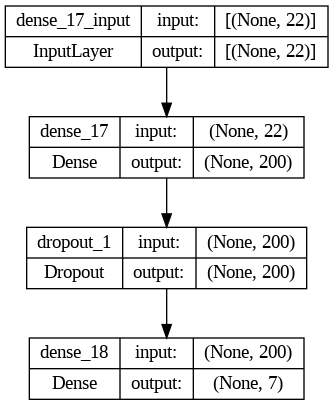

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model9, show_shapes= True)

In [ ]:
print('Test Loss:',test_loss)
print('Train Loss:',train_loss)

loss_test.append(test_loss)
loss_train.append(train_loss)

Test Loss: 0.43405866622924805
Train Loss: 0.08861973881721497


# Comment 9:
Basic model: Training loss: 0.1217; Test loss: 0.3881. Overfitting

Model with normalization: Training loss: 0.0204; Test loss: 0.5445. Increase in overfitting.

Model with 50 epochs with normalization: Training loss: 0.0554; Test loss: 0.4472. Overfitting decreased

Model with 300 epochs with normalization: Training loss: 0.0017; Test loss: 0.8068. Overfitting increased. Retain model3

Model with 400 hidden units with normalization: Training loss:0.0441; Test loss: 0.4756. Overfitting compared to model3 increased. Retain model3

Model with 2 hidden layers and normalization: Training loss: 0.0242; Test loss: 0.5922. Overfitting compared to model3 increased. Retain model3

Model with validation split: Training loss: 0.0706; Test loss: 0.4491. Model improved. But still overfitting.

Model with dropout: Training loss: 0.0844; Test loss: 0.4259. Model Improved.

Model with early stopping: Training loss: 0.0886; Test loss: 0.4340. Test loss increased. Reain model8

# MODEL- 10
# Model with BatchNormalization

Epoch 1/50
8/8 [==============================] - 3s 38ms/step - loss: 2.2709 - accuracy: 0.1667 - val_loss: 1.7295 - val_accuracy: 0.4286
Epoch 2/50
8/8 [==============================] - 0s 12ms/step - loss: 1.5323 - accuracy: 0.4802 - val_loss: 1.5152 - val_accuracy: 0.7302
Epoch 3/50
8/8 [==============================] - 0s 11ms/step - loss: 1.1044 - accuracy: 0.6706 - val_loss: 1.3297 - val_accuracy: 0.8413
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.8451 - accuracy: 0.7698 - val_loss: 1.1742 - val_accuracy: 0.8889
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.5943 - accuracy: 0.8571 - val_loss: 1.0436 - val_accuracy: 0.8889
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.5184 - accuracy: 0.8532 - val_loss: 0.9367 - val_accuracy: 0.8889
Epoch 7/50
8/8 [==============================] - 0s 10ms/step - loss: 0.4629 - accuracy: 0.8849 - val_loss: 0.8474 - val_accuracy: 0.8889
Epoch 8/50
8/8 [==============

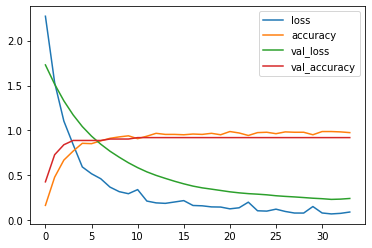

In [ ]:
import tensorflow as tf

model10= tf.keras.Sequential()

model10.add(tf.keras.layers.Dense(200, activation ='relu')) # activation used to decide whether to send signal to next layer or not


# Dropout layer performed on hidden layer
model10.add(tf.keras.layers.Dropout(0.1)) # 10% units in the hidden layer will be inactive

# Batch normalization-> on hidden layers
model10.add(tf.keras.layers.BatchNormalization())

model10.add(tf.keras.layers.Dense(7, activation= 'softmax'))

# Compiling the model

model10.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Training
tf.random.set_seed(100)

hist10= model10.fit(X_train, y_train, epochs=50, validation_split= 0.2, callbacks=[early_stop])
hist10= pd.DataFrame(hist10.history)
hist10.plot();

In [ ]:
train_loss= float(hist10['loss'].iloc[-1:])
train_accuracy= float(hist10['accuracy'].iloc[-1:])
train_loss, train_accuracy

(0.0925760567188263, 0.976190447807312)

In [ ]:
test_loss, test_accuracy = model10.evaluate(X_test, y_test)
test_loss, test_accuracy

3/3 [==============================] - 0s 5ms/step - loss: 0.4459 - accuracy: 0.8608


(0.4459269940853119, 0.8607594966888428)

In [ ]:
accuracy_test.append(test_accuracy)

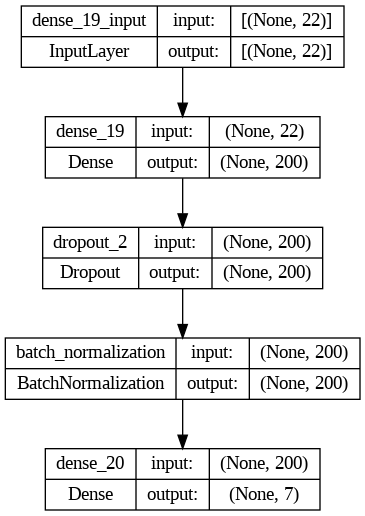

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model10, show_shapes= True)

In [ ]:
print('Test Loss:',test_loss)
print('Train Loss:', train_loss)

loss_test.append(test_loss)
loss_train.append(train_loss)

Test Loss: 0.4459269940853119
Train Loss: 0.0925760567188263


# Comment 10:
Basic model: Training loss: 0.1217; Test loss: 0.3881. Overfitting

Model with normalization: Training loss: 0.0204; Test loss: 0.5445. Increase in overfitting.

Model with 50 epochs with normalization: Training loss: 0.0554; Test loss: 0.4472. Overfitting decreased

Model with 300 epochs with normalization: Training loss: 0.0017; Test loss: 0.8068. Overfitting increased. Retain model3

Model with 400 hidden units with normalization: Training loss:0.0441; Test loss: 0.4756. Overfitting compared to model3 increased. Retain model3

Model with 2 hidden layers and normalization: Training loss: 0.0242; Test mse: 0.5922. Overfitting compared to model3 increased. Retain model3

Model with validation split: Training loss: 0.0706; Test loss: 0.4491. Model improved. But still overfitting.

Model with dropout: Training loss: 0.0844; Test loss: 0.4259. Model Improved.

Model with early stopping: Training loss: 0.0886; Test loss: 0.4340. Test loss increased. Reain model8

Model with Batch Normalization: Training loss: 0.0925; Test loss: 0.4459. Overfitting increased. Retain model8

# MODEL- 11
# Model with WeightDecay

Epoch 1/50
8/8 [==============================] - 1s 39ms/step - loss: 2.3453 - accuracy: 0.4683 - val_loss: 2.1377 - val_accuracy: 0.6667
Epoch 2/50
8/8 [==============================] - 0s 11ms/step - loss: 1.9649 - accuracy: 0.7222 - val_loss: 1.7966 - val_accuracy: 0.7302
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 1.6581 - accuracy: 0.7698 - val_loss: 1.5193 - val_accuracy: 0.8095
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 1.4353 - accuracy: 0.8294 - val_loss: 1.3160 - val_accuracy: 0.8889
Epoch 5/50
8/8 [==============================] - 0s 11ms/step - loss: 1.2725 - accuracy: 0.8532 - val_loss: 1.1653 - val_accuracy: 0.9048
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 1.1360 - accuracy: 0.8889 - val_loss: 1.0579 - val_accuracy: 0.9048
Epoch 7/50
8/8 [==============================] - 0s 11ms/step - loss: 1.0641 - accuracy: 0.8929 - val_loss: 0.9853 - val_accuracy: 0.9206
Epoch 8/50
8/8 [==============

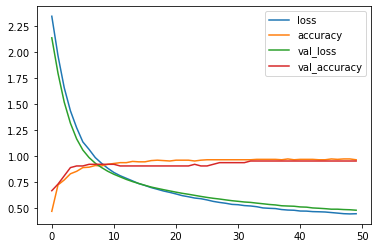

In [ ]:
# Adding a weight decay penalty to the loss function during training can help prevent overfitting by encouraging the model to use smaller weights.

from tensorflow.keras import regularizers

model11 = tf.keras.Sequential()
model11.add(tf.keras.layers.Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Dropout layer performed on hidden layer
model11.add(tf.keras.layers.Dropout(0.1)) # 10% units in the hidden layer will be inactive

model11.add(tf.keras.layers.Dense(7, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

# Compiling the Model with weight decay
model11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(), 
                metrics='accuracy')

# Training with weight decay
tf.random.set_seed(100)
hist11 = model11.fit(X_train, y_train, epochs=50, validation_split=0.2)

# Plotting the loss and accuracy curves
hist11= pd.DataFrame(hist11.history)
hist11.plot();

In [ ]:
train_loss= float(hist11['loss'].iloc[-1:])
train_accuracy= float(hist11['accuracy'].iloc[-1:])
train_loss, train_accuracy

(0.4449644982814789, 0.9642857313156128)

In [ ]:
# Evaluation
test_loss, test_accuracy = model11.evaluate(X_test, y_test)
test_loss, test_accuracy

3/3 [==============================] - 0s 6ms/step - loss: 0.6854 - accuracy: 0.9114


(0.6854017972946167, 0.9113923907279968)

In [ ]:
accuracy_test.append(test_accuracy)

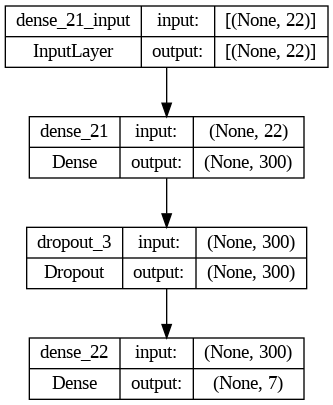

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model11, show_shapes= True)

In [ ]:
print('Test Loss:',test_loss)
print('Train Loss:', train_loss)

loss_test.append(test_loss)
loss_train.append(train_loss)

Test Loss: 0.6854017972946167
Train Loss: 0.4449644982814789


# Comment 11:
Basic model: Training loss: 0.1217; Test loss: 0.3881. Overfitting

Model with normalization: Training loss: 0.0204; Test loss: 0.5445. Increase in overfitting.

Model with 50 epochs with normalization: Training loss: 0.0554; Test loss: 0.4472. Overfitting decreased

Model with 300 epochs with normalization: Training loss: 0.0017; Test loss: 0.8068. Overfitting increased. Retain model3 (Model with 50 epochs)

Model with 400 hidden units with normalization: Training loss: 0.0441; Test loss: 0.4756. Overfitting compared to model3 increased. Retain model3 (Model with 50 epochs)

Model with 2 hidden layers and normalization: Training loss: 0.0242; Test mse: 0.5922. Overfitting compared to model3 increased. Retain model3 (Model with 50 epochs)

Model with validation split: Training loss: 0.0706; Test loss: 0.4491. Model improved. But still overfitting.

Model with dropout: Training loss: 0.0844; Test loss: 0.4259. Model Improved.

Model with early stopping: Training loss: 0.0886; Test loss: 0.4340. Test loss increased. Reain model8 (Model with dropout)

Model with Batch Normalization: Training loss: 0.0925; Test loss: 0.6854. Overfitting increased. Retain model8 (Model with dropout)

Model with Weight Decay: Training loss: 0.4449; Test loss: 0.6854. Test loss increased compared to model8 (Model with dropout)

## Loss and Accuracy Graph

In [ ]:
loss_test2=loss_test
loss_train2=loss_train

x_axis= ['Model 1', 'Model 2', 'Model 3','Model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 8','Model 9', 'Model 10', 'Model 11']

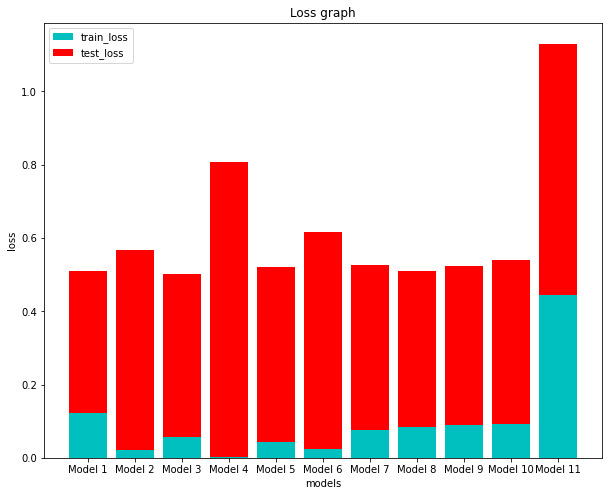

In [ ]:
plt.figure(figsize=(10,8))

plt.bar(x_axis, loss_train2, color= 'c',  label='train_loss')
plt.bar(x_axis, loss_test2, color='r', bottom=loss_train2,label='test_loss')

plt.xlabel('models')
plt.ylabel('loss')
plt.title("Loss graph")

plt.legend();

In [ ]:
acc= pd.DataFrame(accuracy_test, columns=['Test Accuracy'], index=['Model 1', 'Model 2', 'Model 3','Model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 8','Model 9', 'Model 10', 'Model 11'])
acc

,Test Accuracy
Model 1,0.911392
Model 2,0.898734
Model 3,0.911392
Model 4,0.911392
Model 5,0.911392
Model 6,0.898734
Model 7,0.898734
Model 8,0.911392
Model 9,0.911392
Model 10,0.860759


### Best accracy: 91% given by Model 1, Model 3, Model 4,Model 8, Model 9, and Model 11

# The best model is model8
## Saving the model

In [ ]:
model8.save('best_migraine_model.h5') # saved in hdf format

## Loading the model

In [ ]:
from keras.models import load_model

migraine= tf.keras.models.load_model('best_migraine_model.h5')
type(migraine)

keras.engine.sequential.Sequential

In [ ]:
## Evaluating the model
migraine.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 0.4169 - accuracy: 0.8987


[0.41691261529922485, 0.8987341523170471]